In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key


In [2]:
import citipy

In [3]:
from citipy import citipy

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs

[(17.90895602140027, 56.31961579988274),
 (-52.33380932832473, 36.65260573201118),
 (-9.206814875920557, 137.24487344132837),
 (85.11785626633826, -48.19101244627237),
 (11.815486063744771, -71.38052812446747),
 (-86.80776969309355, -51.56030355078377),
 (-60.03164630610894, -170.00477628833124),
 (-11.60474860877001, -28.96958650525079),
 (73.93946421160948, -116.72923914494618),
 (47.31617509283876, 7.6607678953998),
 (19.829782741583017, 32.97100347278459),
 (-5.5385827108976, -150.34757639854678),
 (-50.49544064828201, -81.27435133072697),
 (-68.5844773200975, 85.4450338320089),
 (51.24280419726719, -150.83034425736125),
 (-39.69383675232737, -0.31167369161690317),
 (-89.44320262167788, -48.38620086125954),
 (-51.66962137542492, -50.490907189302845),
 (-85.34070463184408, -43.3690981646117),
 (-70.04412714526902, -151.03822868599624),
 (4.28919798201828, -20.36635071009053),
 (75.51686601074962, -129.12320746799614),
 (-73.15087688307258, 175.2168475663516),
 (-48.33464373039277, -

In [6]:
len(lat_lngs)

1500

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [8]:
url = f"https://api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={weather_api_key}"
print(url)


https://api.openweathermap.org/data/2.5/weather?q=salalah&appid=1e846faa821185d92b5aae70d3998274


In [9]:


# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
  # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&London&units=imperial"
    #city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | salalah
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | nhulunbuy
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | uribia
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | sao jose da coroa grande
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | balsthal
Processing Record 11 of Set 1 | marawi
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | goderich
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | kaitangata
Processing Record 22 of Set 1 | castro
Processing Record 23 of Set 1 | thompson
Processing Record 24 of Set 1 | tiksi
Processi

Processing Record 40 of Set 4 | saraland
Processing Record 41 of Set 4 | uddevalla
Processing Record 42 of Set 4 | bac can
City not found. Skipping...
Processing Record 43 of Set 4 | tura
Processing Record 44 of Set 4 | hualmay
Processing Record 45 of Set 4 | witu
Processing Record 46 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | mecca
Processing Record 49 of Set 4 | conakry
Processing Record 50 of Set 4 | saint george
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | vardo
Processing Record 3 of Set 5 | eenhana
Processing Record 4 of Set 5 | ketchikan
Processing Record 5 of Set 5 | thunder bay
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | henties bay
Processing Record 8 of Set 5 | caravelas
Processing Record 9 of Set 5 | abu kamal
Processing Record 10 of Set 5 | picton
Processing Record 11 of Set 5 | morehead
Processing Record 12 of Set 5 | vestmannaeyjar
Processing 

Processing Record 30 of Set 8 | townsville
Processing Record 31 of Set 8 | urumqi
Processing Record 32 of Set 8 | waingapu
Processing Record 33 of Set 8 | daru
Processing Record 34 of Set 8 | romny
Processing Record 35 of Set 8 | poum
Processing Record 36 of Set 8 | bengkulu
Processing Record 37 of Set 8 | chenzhou
Processing Record 38 of Set 8 | selma
Processing Record 39 of Set 8 | basse-pointe
Processing Record 40 of Set 8 | aksu
Processing Record 41 of Set 8 | tabas
Processing Record 42 of Set 8 | vanimo
Processing Record 43 of Set 8 | wanning
Processing Record 44 of Set 8 | vallenar
Processing Record 45 of Set 8 | linqiong
Processing Record 46 of Set 8 | palembang
Processing Record 47 of Set 8 | scharnstein
Processing Record 48 of Set 8 | puerto escondido
Processing Record 49 of Set 8 | palanga
Processing Record 50 of Set 8 | brigantine
Processing Record 1 of Set 9 | bani
Processing Record 2 of Set 9 | aitape
Processing Record 3 of Set 9 | beni suef
Processing Record 4 of Set 9 | 

Processing Record 13 of Set 12 | melo
Processing Record 14 of Set 12 | mokshan
Processing Record 15 of Set 12 | ulladulla
Processing Record 16 of Set 12 | alihe
Processing Record 17 of Set 12 | lachi
Processing Record 18 of Set 12 | airai
Processing Record 19 of Set 12 | nsanje
Processing Record 20 of Set 12 | tual
Processing Record 21 of Set 12 | bathsheba
Processing Record 22 of Set 12 | labrea
Processing Record 23 of Set 12 | campina verde
Processing Record 24 of Set 12 | shingu
Processing Record 25 of Set 12 | atar
Processing Record 26 of Set 12 | lubbock
Processing Record 27 of Set 12 | nerchinskiy zavod
Processing Record 28 of Set 12 | nova borova
Processing Record 29 of Set 12 | ambovombe
Processing Record 30 of Set 12 | kandrian
Processing Record 31 of Set 12 | genhe
Processing Record 32 of Set 12 | carman
Processing Record 33 of Set 12 | great yarmouth
Processing Record 34 of Set 12 | katsuura
Processing Record 35 of Set 12 | flin flon
Processing Record 36 of Set 12 | sri aman

In [11]:
len(city_data)


584

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salalah,17.0151,54.0924,77.09,88,75,5.75,OM,2021-08-12 20:27:09
1,Port Alfred,-33.5906,26.8910,55.38,69,100,11.79,ZA,2021-08-12 20:27:59
2,Nhulunbuy,-12.2333,136.7667,72.21,88,40,5.75,AU,2021-08-12 20:27:59
3,Upernavik,72.7868,-56.1549,42.39,92,100,2.86,GL,2021-08-12 20:28:00
4,Uribia,11.7139,-72.2660,94.64,42,73,15.97,CO,2021-08-12 20:28:00
5,Ushuaia,-54.8000,-68.3000,46.06,76,75,27.63,AR,2021-08-12 20:28:01
6,Vaini,-21.2000,-175.2000,69.96,78,40,10.36,TO,2021-08-12 20:28:01
7,Sao Jose Da Coroa Grande,-8.8978,-35.1478,75.76,77,10,7.25,BR,2021-08-12 20:28:01
8,Yellowknife,62.4560,-114.3525,64.92,59,75,6.91,CA,2021-08-12 20:28:02
9,Balsthal,47.3161,7.6932,76.21,88,52,0.67,CH,2021-08-12 20:28:02


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", 
                    "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Salalah,OM,2021-08-12 20:27:09,17.0151,54.0924,77.09,88,75,5.75
1,Port Alfred,ZA,2021-08-12 20:27:59,-33.5906,26.8910,55.38,69,100,11.79
2,Nhulunbuy,AU,2021-08-12 20:27:59,-12.2333,136.7667,72.21,88,40,5.75
3,Upernavik,GL,2021-08-12 20:28:00,72.7868,-56.1549,42.39,92,100,2.86
4,Uribia,CO,2021-08-12 20:28:00,11.7139,-72.2660,94.64,42,73,15.97
5,Ushuaia,AR,2021-08-12 20:28:01,-54.8000,-68.3000,46.06,76,75,27.63
6,Vaini,TO,2021-08-12 20:28:01,-21.2000,-175.2000,69.96,78,40,10.36
7,Sao Jose Da Coroa Grande,BR,2021-08-12 20:28:01,-8.8978,-35.1478,75.76,77,10,7.25
8,Yellowknife,CA,2021-08-12 20:28:02,62.4560,-114.3525,64.92,59,75,6.91
9,Balsthal,CH,2021-08-12 20:28:02,47.3161,7.6932,76.21,88,52,0.67


In [15]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

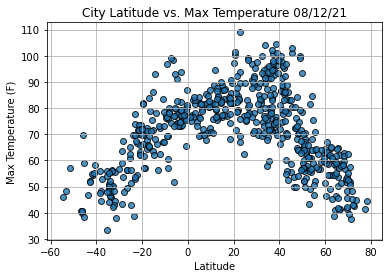

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

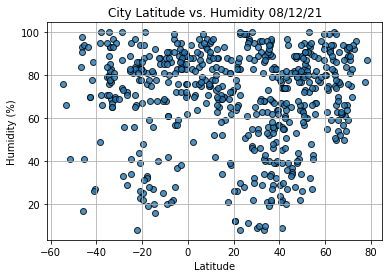

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

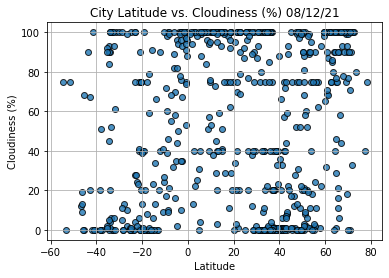

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

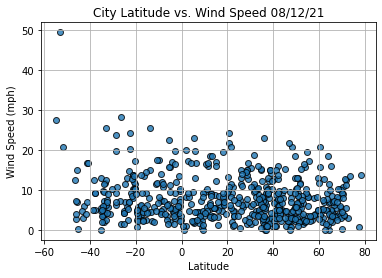

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [49]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Remember loc: row = df.loc[row_index]
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-08-12 20:28:03
Lat                        -33.65
Lng                      115.3333
Max Temp                    46.09
Humidity                       83
Cloudiness                     52
Wind Speed                   6.17
Name: 13, dtype: object

In [48]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

In [36]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)].head()

In [44]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (10,40))
plt.show()